# Tobig's 16기 3주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [15]:
import pandas as pd
import numpy as np
import random

In [16]:
data = pd.read_csv('C:/Users/xnote/Desktop/투빅스/3주차/wk3_optimization/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Label       200 non-null    int64  
 1   bias        200 non-null    int64  
 2   experience  200 non-null    float64
 3   salary      200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [18]:
data.bias.value_counts()

1    200
Name: bias, dtype: int64

## Train Test 데이터 나누기

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [23]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [24]:
# parameter 개수
N = len(X_train.loc[0])
print(N)

3


In [25]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.28125748, 0.92016503, 0.08086081])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [26]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-X_i\theta}}$

In [27]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1/(1+np.exp(-z))
    return p

In [28]:
logistic(X_train.iloc[1], parameters)

0.7983026908686086

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma(y_i\log p(X_i)+(1-y_i)\log(1-p(X_i)))$

In [29]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = y*np.log(p) + (1-y)*np.log(1-p)
    return -loss

In [30]:
# 내적할 때, 서로 shape가 잘맞는지 확인
print(parameters.shape)
print(len(np.dot(X_train,parameters)))
print(len(np.dot(X_train,parameters.reshape(-1,1))))

(3,)
150
150


In [31]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters)
    loss = ((y-y_hat)**2)/2
    return loss

In [32]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n : 현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [33]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.9543332496313484

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma[(y_i-\theta^{T}X_i)X_{ij}]$
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma[(y_i-p_i)X_{ij}]$

In [40]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        # 위에서 정의한 dot_product()함수를 통해 y_hat을 구하기 (벡터나 행렬의 내적은 합을 동반하므로 sigma는 따로 필요없음)
        y_hat = dot_product(X,parameters)
        gradient = -(y-y_hat)*X[j]
    else:
        # 위에서 만든 logistic()함수를 통해 시그모이드 함수 구하고 이 함수의 gradient까지 도출하기
        p = logistic(X,parameters)
        gradient = -(y-p)*X[j]
    return gradient

뒤에서 루프를 통해 여러 행(batch dataset)에 대해 다룰 것이므로 위 함수에서는 하나의 행에 대해서만 gradient를 출력하도록 함.

In [51]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.11993229782510513

In [41]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.07713917320172926

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [47]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X,y,parameters,j,model)
    
    return gradients

In [50]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[0.18862239882450849, 128.9466985990136, 128.63939887550058]

In [49]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[41.256254251138344, 13.472617088395454, 38.47699599735951]

## mini-batch
인덱스로 미니 배치 나누기

In [61]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

In [62]:
batch_idx(X_train, 10)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]),
 array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109]),
 array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 array([130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
 array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149])]

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요 


> **설명 : N은 전체 데이터셋의 행의 개수이고, batch_size는 최적화 과정(기울기 갱신) 한번당 쓰일 데이터셋의 행의 개수이다. idx는 0부터 N-1까지의 인덱스를 나열한 배열로, 반복문을 통해 i번째 배치와 i+1번째 배치 전까지의 인덱스를 idx_list에 넣어 출력하는 데에 사용된다. 배치의 크기가 커질수록 데이터셋의 개수는 줄어들며, 배치의 크기가 줄어들면 데이터셋의 개수는 커진다. 따라서 배치의 크기는 전체데이터셋의 크기를 고려하여 결정되어야 한다.**

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [63]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [64]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.28124491, 0.91156859, 0.07228485])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 현재 반복 횟수  
- num_epoch: 총 반복 횟수  
<br>

BGD: 학습 한 번에 모든 데이터셋의 대해 기울기를 계산  
SGD: 학습 한 번에 임의의 데이터 하나에 대해서만 기울기를 계산  
MGD: 학습 한 번에 데이터셋 일부에 대해서만 기울기를 계산  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [73]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [74]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9345260618607345  params: [0.53154578 0.21204716 0.57486158]  gradients: [0.03406776557222189, 0.0017403441616958368, 0.025054675305689274]
epoch: 100  loss: 0.4693508325266181  params: [-0.80502409  0.75616567 -0.67338519]  gradients: [0.003889736208241533, -0.0067259919882686125, 0.007056337229902948]
epoch: 200  loss: 0.39933845350156494  params: [-1.02043771  1.32276439 -1.24033255]  gradients: [0.0013131530254901725, -0.004743856659342771, 0.004652939549718379]
epoch: 300  loss: 0.3655963224005288  params: [-1.12665847  1.73012919 -1.63795032]  gradients: [0.0009022701817583008, -0.003519458958022816, 0.003420376716395757]
epoch: 400  loss: 0.34616042903202765  params: [-1.20777902  2.04077798 -1.93884221]  gradients: [0.0007360676260198314, -0.0027555174956714686, 0.002660052603896285]
epoch: 500  loss: 0.3338234049526657  params: [-1.27537239  2.28876069 -2.17756751]  gradients: [0.0006222149734966432, -0.002239994442867347, 0.002150449283212491]
epoch: 600  lo

array([-1.49703086,  3.05354995, -2.90545255])

> BGD방식은 한번에 모든 데이터셋에 대해 기울기를 계산하기에 속도는 가장 빠르지만 지역 최적화의 문제가 발생할 수 있다.

In [75]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.2766023839579943  params: [-0.87286904  1.15226048 -1.27613877]  gradients: [0.02499427591061571, 0.013601908856784356, 0.017585741128443494]
epoch: 100  loss: 0.07736668581128785  params: [-1.93032598  4.17502036 -4.06769192]  gradients: [0.007538540675391516, 0.004102481045921648, 0.005304047425809625]
epoch: 200  loss: 0.07736266551921321  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521584201, 0.004102273621655146, 0.005303779249519601]
epoch: 300  loss: 0.07736266518361704  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767116, 0.0041022736043402576, 0.0053037792271333935]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 

array([-1.9303681 ,  4.17514311, -4.06780375])

> SGD방식은 한번에 임의의 데이터 하나에 대해 기울기를 계산하기에 속도는 BGD방식에 비해 많이 느리지만 지역최적화에 빠질 위험성이 상대적으로 낮다.

In [78]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size=15)
new_param_mgd

epoch: 0  loss: 1.0122366048889482  params: [0.01192712 0.0096865  0.63518556]  gradients: [0.033470753062868695, 0.027807125519592312, 0.06432962453321321]
epoch: 100  loss: 0.2359406278153507  params: [-1.49471986  3.04326427 -2.90108201]  gradients: [0.0017907305545148855, -0.0009585788878633271, 0.003131109689536421]
epoch: 200  loss: 0.2113847706696736  params: [-1.69579934  3.70355844 -3.51934594]  gradients: [0.0026975533964774174, -0.001048028911913541, 0.0012863950657978703]
epoch: 300  loss: 0.20352024082534567  params: [-1.78108305  3.97993031 -3.7755878 ]  gradients: [0.0030970327680041147, -0.0010448678417763818, 0.0006710729169669334]
epoch: 400  loss: 0.20015252242918447  params: [-1.82235418  4.11314608 -3.89859494]  gradients: [0.003289466422008359, -0.0010378555925006402, 0.00040071826833665064]
epoch: 500  loss: 0.19853498287179383  params: [-1.84341133  4.18099885 -3.96112527]  gradients: [0.0033870752239882193, -0.0010332045370942083, 0.0002689560402161268]
epoch: 

array([-1.86591008,  4.25341594, -4.02777214])

> MGD방식은 SGD와 BGD방식을 혼합한 것으로 속도는 SGD보다 빠르고, 지역 최적화에 빠질 위험성은 BGD보다 낮다는 장점이 있다.

### Predict Label

In [82]:
# new_param_bgd를 활용한 에측
y_predict_bgd = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict_bgd.append(1)
    else :
        y_predict_bgd.append(0)
        
# new_param_sgd를 활용한 예측
y_predict_sgd = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_sgd)
    if p > 0.5 :
        y_predict_sgd.append(1)
    else :
        y_predict_sgd.append(0)

# new_param_mgd를 활용한 예측
y_predict_mgd = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd)
    if p > 0.5 :
        y_predict_mgd.append(1)
    else :
        y_predict_mgd.append(0)
        
# 파라미터를 랜덤으로하여 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [80]:
from sklearn.metrics import *

In [104]:
a=['BGD','SGD','MGD','랜덤']
for i, y_predict in enumerate([y_predict_bgd, y_predict_sgd, y_predict_mgd, y_predict_random]):
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    accuracy = (tp+tn) / (tp+fn+fp+tn)
    print(f'{a[i]}방식으로 예측한 오차행렬','\n',confusion_matrix(y_test, y_predict),'\n',"accuracy:",accuracy,'\n')

BGD방식으로 예측한 오차행렬 
 [[38  2]
 [ 4  6]] 
 accuracy: 0.88 

SGD방식으로 예측한 오차행렬 
 [[38  2]
 [ 1  9]] 
 accuracy: 0.94 

MGD방식으로 예측한 오차행렬 
 [[38  2]
 [ 1  9]] 
 accuracy: 0.94 

랜덤방식으로 예측한 오차행렬 
 [[13 27]
 [ 1  9]] 
 accuracy: 0.44 



## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [128]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [129]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [130]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.45845902, 2.92911047])

In [135]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, batch_size = 30, model='linear')
new_param

epoch: 0  loss: 1.0800821785061923  params: [0.81333132 0.52462177]  gradients: [-0.09002222359652245, -0.0678587636885969]
epoch: 100  loss: 0.35566956145592843  params: [0.50285637 2.85833489]  gradients: [-0.013339524981781403, -0.01267084049019623]
epoch: 200  loss: 0.35172498078473535  params: [0.46559215 2.93054234]  gradients: [-0.014101680185225136, -0.012289119296642002]
epoch: 300  loss: 0.3515905333574132  params: [0.46422254 2.93319624]  gradients: [-0.01412969235396421, -0.012275089557768883]
epoch: 400  loss: 0.35158560611755163  params: [0.46417221 2.93329378]  gradients: [-0.014130721910141145, -0.012274573910285377]
epoch: 500  loss: 0.35158542504153567  params: [0.46417036 2.93329737]  gradients: [-0.014130759750335904, -0.012274554958234344]
epoch: 600  loss: 0.35158541838631374  params: [0.46417029 2.9332975 ]  gradients: [-0.014130761141110268, -0.012274554261672748]
epoch: 700  loss: 0.3515854181417083  params: [0.46417028 2.93329751]  gradients: [-0.0141307611922

array([0.46417028, 2.93329751])

In [136]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

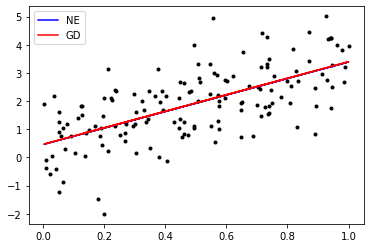

In [137]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

정규방정식과 경사하강법으로 구한 회귀선이 거의 일치하는 것을 확인할 수 있다